## Getting Started with Python for Finance

LinkedIn Learning course by Matt Harrison

Goals:
- Get Data
- Inspect data
- The .pipe method

1) Loading data

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import installPack
# import pyfolio as pf

In [2]:
# Request overview on the install package detailed within py file
help(installPack)

Help on module installPack:

NAME
    installPack - Created on Mon Jun 12 15:39:21 2023

DESCRIPTION
    @author: jamesmcneill
    
    Overview: code used to review if a package exists and to install if missing from library
    Example code: will install the library name(s) contained within the requirements list
        requirements = ["yfinance"]
        for requirement in requirements:
            installPackage(requirement)

FUNCTIONS
    installPackage(package)
        # Function to review and install package if missing

FILE
    c:\users\jamesmcneill\documents\01_work\installpack.py




In [3]:
# Use the user defined py file to review and install packages
requirements = ["pyfolio"]
for requirement in requirements:
    installPack.installPackage(requirement)

# yfinance is not working so have to try alternatives
# import yfinance as yf

In [4]:
# Import pyfolio library
# import pyfolio as pf

In [5]:
# Finance and financial modelling alternatives to yfinance
# https://www.activestate.com/blog/top-10-python-packages-for-finance-and-financial-modeling/
# https://thecleverprogrammer.com/2023/05/08/stock-market-performance-analysis-using-python/
# stock_rets = pf.utils.get_symbol_rets('FB')
# pf.create_returns_tear_sheet(stock_rets, live_start_date='2015-12-1')

In [6]:
# Had to download the stock price data
raw = pd.read_csv("stocks.csv")

In [7]:
# data has been configured to allow for analysis
raw

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [8]:
raw.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [9]:
# Going to use the .pipe method a lot. Running the code with the "?" provides the summary details on the request. With this example
# details from the docstring are shared for the pipe method. The iPython feature of jupyter notebook provides output details.
raw.pipe?

Signature:
raw.pipe(
    func: 'Callable[..., T] | tuple[Callable[..., T], str]',
    *args,
    **kwargs,
) -> 'T'
Docstring:
Apply chainable functions that expect Series or DataFrames.

Parameters
----------
func : function
    Function to apply to the Series/DataFrame.
    ``args``, and ``kwargs`` are passed into ``func``.
    Alternatively a ``(callable, data_keyword)`` tuple where
    ``data_keyword`` is a string indicating the keyword of
    ``callable`` that expects the Series/DataFrame.
args : iterable, optional
    Positional arguments passed into ``func``.
kwargs : mapping, optional
    A dictionary of keyword arguments passed into ``func``.

Returns
-------
object : the return type of ``func``.

See Also
--------
DataFrame.apply : Apply a function along input axis of DataFrame.
DataFrame.applymap : Apply a function elementwise on a whole DataFrame.
Series.map : Apply a mapping correspondence on a
    :class:`~pandas.Series`.

Notes
-----
Use ``.pipe`` when chaining together 

In [10]:
# Reviewing the columns function. This code was used to resolve the multi-hierarchy nature of the columns from the yfinance api output
def fix_cols(df):
    coloumns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

# (
#     raw
#     .iloc[:, ::2]
#     .pipe(fix_cols)
# )

In [11]:
# Create a number of functions that can be used at the beginning of the code to bring in the data. The other code shown within the notebook
# provides inner workings of what analysis was completed to produce the tidy version of the final function. 

# Example below is shown from the course
# import yfinance as yf

def fix_cols(df):
    coloumns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')
    return (raw
        .iloc[:, ::2]
        .pipe(fix_cols)            
    )

# tweak_data()

In [12]:
# Functions created by myself to show similar steps
def import_data():
    raw = raw = pd.read_csv("stocks.csv")
    return raw

raw = import_data()
raw

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [13]:
# Set index to date to allow for working with plots
raw = raw.set_index('Date')

In [14]:
# Convert index to datetime to use within resample method later
raw.index = pd.to_datetime(raw.index)

In [15]:
type(raw.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
raw_d = raw.loc[lambda df: df.Ticker == 'AAPL']
raw_d

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...
2023-05-01,AAPL,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
2023-05-02,AAPL,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
2023-05-03,AAPL,169.500000,170.919998,167.160004,167.449997,167.449997,65136000


<AxesSubplot:xlabel='Date'>

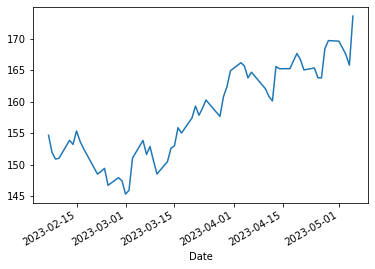

In [17]:
(
    raw_d
    .Close
    .plot()
)

<AxesSubplot:xlabel='Date'>

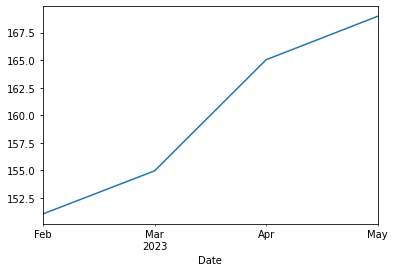

In [18]:
# Resampling
(
    raw_d
    .resample('M')
    .Close
    .mean()
    .plot()
)

## Candlestick plot

,Open,High,Low,Close
Date,,,,
2023-02-12,150.639999,155.229996,149.220001,151.009995
2023-02-19,150.949997,156.330002,150.850006,152.550003
2023-02-26,150.199997,151.300003,145.720001,146.710007
2023-03-05,147.710007,151.110001,143.899994,151.029999
2023-03-12,153.789993,156.300003,147.610001,148.500000
2023-03-19,147.809998,156.740005,147.699997,155.000000
2023-03-26,155.070007,162.139999,154.149994,160.250000
2023-04-02,159.940002,165.000000,155.979996,164.899994
2023-04-09,164.270004,166.839996,161.800003,164.660004


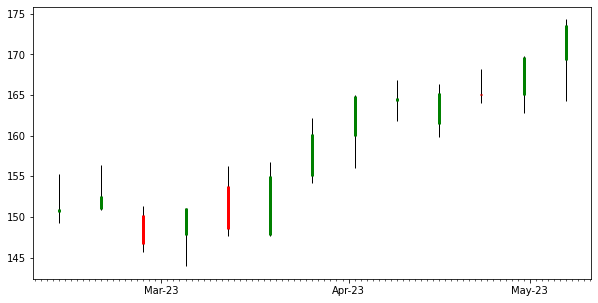

In [19]:
# Display the figure and axis from matplotlib to use within the function
fig, ax = plt.subplots(figsize=(10, 5))

# Candlestick function
def plot_candle(df, ax):
    # wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    # red -> decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    # green -> increase
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    # set major and minor locators
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

# Having the chain methods allows the user to comment out and still produce outputs
(raw_d
 .resample('W') # Dateoffset options ['D':'daily', 'W':'weekly', 'SM':'semi-monthly', 'M':'monthly'] https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
 .agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last'}) # pass dictionary to produce the output e.g., 'value':'agg method'
 # .loc['mar 2023':'jun 2023'] # can apply the date filter as the dataframe has a datetime index
 .pipe(plot_candle, ax) # apply the function to the data
)

## Calculations

In [20]:
# Returns
raw_d.Close.pct_change()

Date
2023-02-07         NaN
2023-02-08   -0.017653
2023-02-09   -0.006912
2023-02-10    0.000928
2023-02-13    0.018807
                ...   
2023-05-01   -0.000530
2023-05-02   -0.006191
2023-05-03   -0.006467
2023-05-04   -0.009913
2023-05-05    0.046927
Name: Close, Length: 62, dtype: float64

<AxesSubplot:>

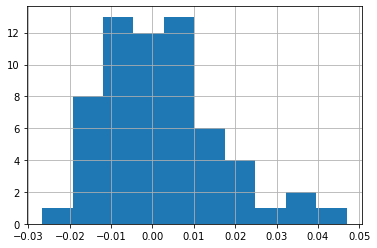

In [21]:
# Plot returns
(raw_d
 .Close
 .pct_change()
 .hist()
)

<AxesSubplot:>

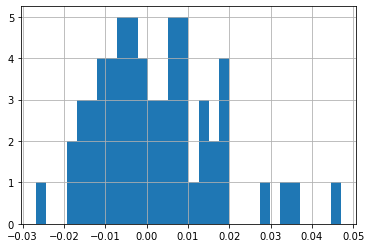

In [22]:
(raw_d
 .Close
 .pct_change()
 .hist(bins=30)
)

<AxesSubplot:xlabel='Date'>

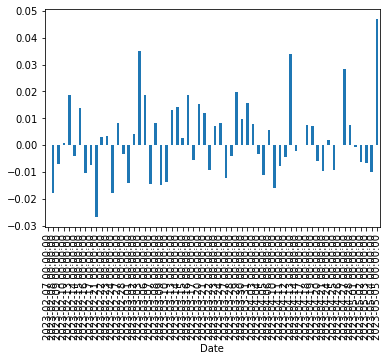

In [23]:
# Review with Barplot
(raw_d
 .Close
 .pct_change()
 .iloc[-100:] # last 100 values if there is this number of rows
 .plot.bar()
)

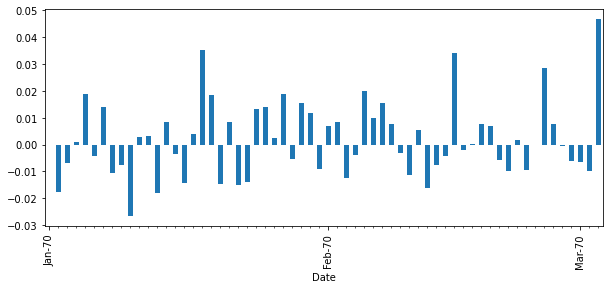

In [24]:
# Lets tidy the barplot up
fig, ax = plt.subplots(figsize=(10, 4))
(raw_d
 .Close
 .pct_change()
 .iloc[-100:] # last 100 values if there is this number of rows
 .plot.bar(ax=ax)
)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())
# Challenge with the output is that pandas plot() method was not able to show the dates correctly.
# Have to use matplotlib to fix this as pandas treats dates as categoricals.

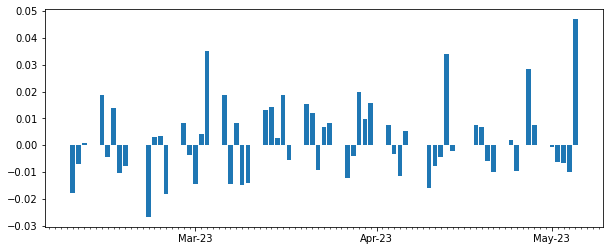

In [25]:
# Return - using matplotlib
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10, 4))
_ = (raw_d
 .Close
 .pct_change()
 .iloc[-100:]
 .pipe(my_bar, ax)
)

In [26]:
# Cumulative Returns
# (current price - original price) / original price

<AxesSubplot:xlabel='Date'>

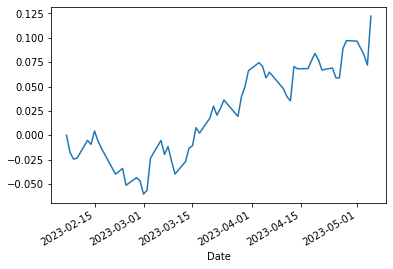

In [27]:
(raw_d
 .Close
 .sub(raw_d.Close[0]) # subtract the first value
 .div(raw_d.Close[0]) # divide by the first value
 .plot()
)

<AxesSubplot:xlabel='Date'>

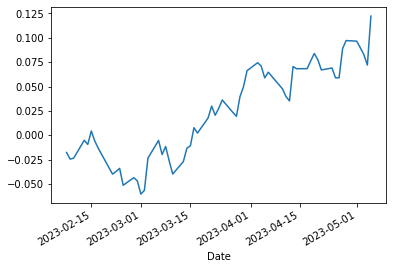

In [28]:
# Alternative calculation
(raw_d
 .Close
 .pct_change()
 .add(1)
 .cumprod()
 .sub(1)
 .plot()
)

In [29]:
# Understanding which method to follow would require benchmarking of approach to understand speed

In [30]:
# To review what calculations are taking place jupyter notebook can display doc strings
raw_d.cumprod??
# Including ?? will provide the source code as well. Source code can be used to follow location 
# of original calculation

Signature: raw_d.cumprod(axis=None, skipna=True, *args, **kwargs)
Docstring:
Return cumulative product over a DataFrame or Series axis.

Returns a DataFrame or Series of the same size containing the cumulative
product.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    The index or the name of the axis. 0 is equivalent to None or 'index'.
skipna : bool, default True
    Exclude NA/null values. If an entire row/column is NA, the result
    will be NA.
*args, **kwargs
    Additional keywords have no effect but might be accepted for
    compatibility with NumPy.

Returns
-------
Series or DataFrame
    Return cumulative product of Series or DataFrame.

See Also
--------
core.window.Expanding.prod : Similar functionality
    but ignores ``NaN`` values.
DataFrame.prod : Return the product over
    DataFrame axis.
DataFrame.cummax : Return cumulative maximum over DataFrame axis.
DataFrame.cummin : Return cumulative minimum over DataFrame axis.
DataFrame.cumsum : Retu

In [31]:
pd.core.generic.NDFrame.cumprod??

Signature:
pd.core.generic.NDFrame.cumprod(
    self,
    axis: 'Axis | None' = None,
    skipna: 'bool_t' = True,
    *args,
    **kwargs,
)
Docstring: <no docstring>
Source:   
    def cumprod(self, axis: Axis | None = None, skipna: bool_t = True, *args, **kwargs):
        return self._accum_func("cumprod", np.cumprod, axis, skipna, *args, **kwargs)
File:      c:\users\jamesmcneill\anaconda3\lib\site-packages\pandas\core\generic.py
Type:      function


In [32]:
np.cumprod??

Signature: np.cumprod(a, axis=None, dtype=None, out=None)
Source:   
@array_function_dispatch(_cumprod_dispatcher)
def cumprod(a, axis=None, dtype=None, out=None):
    """
    Return the cumulative product of elements along a given axis.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative product is computed.  By default
        the input is flattened.
    dtype : dtype, optional
        Type of the returned array, as well as of the accumulator in which
        the elements are multiplied.  If *dtype* is not specified, it
        defaults to the dtype of `a`, unless `a` has an integer dtype with
        a precision less than that of the default platform integer.  In
        that case, the default platform integer is used instead.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        

<AxesSubplot:xlabel='Date'>

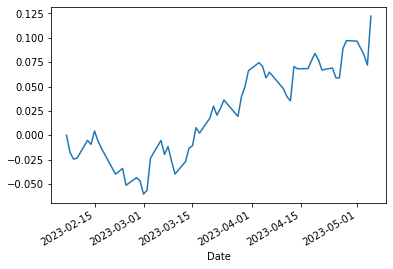

In [33]:
# Create a function for calculating series
def calc_cum_returns(df, col):
    ser = df[col]
    return (ser
           .sub(ser[0])
           .div(ser[0]))

(raw_d
 .pipe(calc_cum_returns, 'Close')
 .plot()
)

In [34]:
# Reviewing smaller functions e.g., lambda is an anonymous function usually one liners
def get_returns(df):
    return calc_cum_returns(df, 'Close') # hardcoding values when using previous function

get_returns(raw_d)

Date
2023-02-07    0.000000
2023-02-08   -0.017653
2023-02-09   -0.024442
2023-02-10   -0.023537
2023-02-13   -0.005173
                ...   
2023-05-01    0.096605
2023-05-02    0.089816
2023-05-03    0.082768
2023-05-04    0.072034
2023-05-05    0.122341
Name: Close, Length: 62, dtype: float64

In [35]:
# Making use of lambda
(lambda df: get_returns(df))(raw_d)

Date
2023-02-07    0.000000
2023-02-08   -0.017653
2023-02-09   -0.024442
2023-02-10   -0.023537
2023-02-13   -0.005173
                ...   
2023-05-01    0.096605
2023-05-02    0.089816
2023-05-03    0.082768
2023-05-04    0.072034
2023-05-05    0.122341
Name: Close, Length: 62, dtype: float64

In [36]:
# Can use the assign method to produce a new column
(raw_d
 .assign(cum_returns=lambda df:calc_cum_returns(df, 'Close'))
)

,Ticker,Open,High,Low,Close,Adj Close,Volume,cum_returns
Date,,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,0.000000
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-0.017653
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-0.024442
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,-0.023537
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,-0.005173
...,...,...,...,...,...,...,...,...
2023-05-01,AAPL,169.279999,170.449997,168.639999,169.589996,169.589996,52472900,0.096605
2023-05-02,AAPL,170.089996,170.350006,167.539993,168.539993,168.539993,48425700,0.089816
2023-05-03,AAPL,169.500000,170.919998,167.160004,167.449997,167.449997,65136000,0.082768


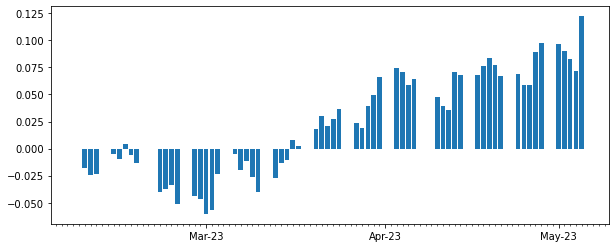

In [37]:
# Return - using matplotlib
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10, 4))
_ = (raw_d
 .pipe(calc_cum_returns, 'Close')
 .iloc[-100:]
 .pipe(my_bar, ax)
)

In [38]:
# Volatility review

In [39]:
(raw_d
 .Close
 .mean()
)

158.24064488564767

In [40]:
(raw_d
 .Close
 .std()
)

7.360485288670256

In [41]:
# Measure of variance in the price change - Volatility
(raw_d
 .assign(pct_change_close=raw_d.Close.pct_change())
 .pct_change_close
 .std()
)

0.014152223819857788

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

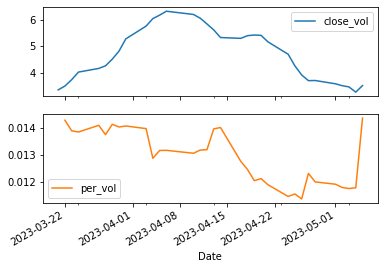

In [42]:
# Rolling provides a window method. Having daily values the variable will only populate when all 30
# values are available
(raw_d
 .assign(close_vol=raw_d.rolling(30).Close.std()
        ,per_vol=raw_d.Close.pct_change().rolling(30).std())
 # .iloc[28:] # Running this will highlight the missing value in row 29 before first value populating in row 30
 .iloc[:, -2:] # [row, col] Using numbers. Select all rows with the last two columns
 .plot(subplots=True) # With subplots will produce two figures based on the two columns
)

In [43]:
# Time to make a 15 day volatility
(raw_d
 .assign(pct_change_close=raw_d.Close.pct_change())
 .resample('15D') # By only applying this it will return the object. To see output have to uncomment next line
 .std() # The output will then display date at each 15 day interval group
)

,Open,High,Low,Close,Adj Close,Volume,pct_change_close
Date,,,,,,,
2023-02-07,1.598457,1.670337,1.464885,2.048086,2.053440,7.868687e+06,0.014259
2023-02-22,3.107981,3.087774,2.975723,2.848322,2.848322,1.239848e+07,0.015540
2023-03-09,3.732799,3.651472,3.774911,3.708118,3.708118,1.103455e+07,0.012434
2023-03-24,2.815409,2.866026,2.920177,3.066892,3.066892,7.237453e+06,0.010894
2023-04-08,2.036812,2.394890,2.391999,2.579258,2.579258,7.352136e+06,0.013877
2023-04-23,2.775007,2.846325,2.579297,3.042878,3.042878,2.158346e+07,0.018453


In [44]:
# Time to make a 15 day volatility Rolling
(raw_d
 .assign(pct_change_close=raw_d.Close.pct_change())
 .rolling(window=15, min_periods=15) 
 .std() 
)

C:\Users\jamesmcneill\AppData\Local\Temp\ipykernel_24512\2302553835.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Ticker'], dtype='object')
  (raw_d


,Open,High,Low,Close,Adj Close,Volume,pct_change_close
Date,,,,,,,
2023-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-05-01,2.238756,2.352275,2.440709,2.766193,2.766193,7.566671e+06,0.012786
2023-05-02,2.477874,2.244001,2.355982,2.529124,2.529124,7.539979e+06,0.012707
2023-05-03,2.386937,1.985861,2.008104,1.932996,1.932996,8.279931e+06,0.012809


C:\Users\jamesmcneill\AppData\Local\Temp\ipykernel_24512\2655155510.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Ticker'], dtype='object')
  (raw_d


<AxesSubplot:xlabel='Date'>

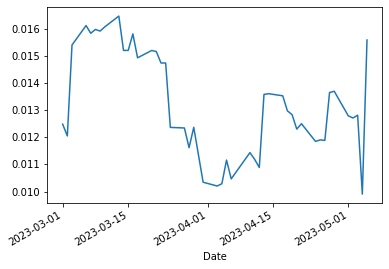

In [45]:
# 15 day rolling volatility
# note if column name conflicts with method name need to use index access ([]) to select column
# within this example pct_change conflicts
(raw_d
 .assign(pct_change=raw_d.Close.pct_change())
 .rolling(window=15, min_periods=15) 
 .std() 
 # .pct_change
 ['pct_change']
 .plot()
)

In [46]:
# Review the output across a reduced period of time
# Key is to build up the output across time

In [47]:
# can be used to understand parameters in method
raw_d.rolling?

Signature:
raw_d.rolling(
    window: 'int | timedelta | BaseOffset | BaseIndexer',
    min_periods: 'int | None' = None,
    center: 'bool_t' = False,
    win_type: 'str | None' = None,
    on: 'str | None' = None,
    axis: 'Axis' = 0,
    closed: 'str | None' = None,
    method: 'str' = 'single',
)
Docstring:
Provide rolling window calculations.

Parameters
----------
window : int, offset, or BaseIndexer subclass
    Size of the moving window.

    If an integer, the fixed number of observations used for
    each window.

    If an offset, the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes.
    To learn more about the offsets & frequency strings, please see `this link
    <https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`__.

    If a BaseIndexer subclass, the window boundaries
    based on the defined ``get_window_bounds

<AxesSubplot:xlabel='Date'>

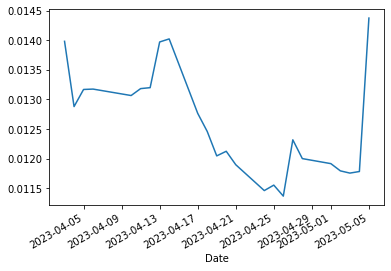

In [48]:
# Build solution across smaller period of time e.g., April and May
# loc method can be applied because the index is a datetime and pandas allows for operations shown when filtering
(raw_d
 .assign(pct_change=raw_d.Close.pct_change())
 .rolling(30, min_periods=30)
 .pct_change
 .std()
 .loc['Apr 2023':'May 2023'] # If this data spanned across years, could use ['2015':'2019'] to take all data
 .plot()
)

By using the chaining style it allows for the build up of the output as more methods are added or commented out. Provides the user with the ability to make alterations and understand impacts more easily.

## Rolling windows

Simple moving average
Goals
- Build intuition for rolling
- Illustrate lambda
- Slicing

In [49]:
# Comparison between user defined moving simple average and built-in method
# User method provides background to built-in. Should use built-in in the wild
(raw_d
 .assign(s1=raw_d.Close.shift(1)
         ,s2=raw_d.Close.shift(2)
         ,ma3=lambda df_:df_.loc[:, ['Close', 's1', 's2']].mean(axis='columns') # to use created values have to use a function, lambda makes this easier. With axis KW default is index, therefore have to change to columns
         ,ma3_builtin=raw_d.Close.rolling(3).mean()
 )
)

,Ticker,Open,High,Low,Close,Adj Close,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN,154.649994,NaN
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,154.649994,NaN,153.284996,NaN
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,151.919998,154.649994,152.479996,152.479996
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,150.869995,151.919998,151.266663,151.266663
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,151.009995,150.869995,151.909999,151.909999
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,AAPL,169.279999,170.449997,168.639999,169.589996,169.589996,52472900,169.679993,168.410004,169.226664,169.226664
2023-05-02,AAPL,170.089996,170.350006,167.539993,168.539993,168.539993,48425700,169.589996,169.679993,169.269994,169.269994
2023-05-03,AAPL,169.500000,170.919998,167.160004,167.449997,167.449997,65136000,168.539993,169.589996,168.526662,168.526662


<AxesSubplot:xlabel='Date'>

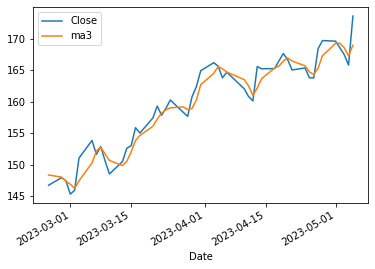

In [50]:
# Moving average plots
(raw_d
 .assign(s1=raw_d.Close.shift(1)
         ,s2=raw_d.Close.shift(2)
         ,ma3=lambda df_:df_.loc[:, ['Close', 's1', 's2']].mean(axis='columns') # to use created values have to use a function, lambda makes this easier. With axis KW default is index, therefore have to change to columns
         ,ma3_builtin=raw_d.Close.rolling(3).mean()
 )
 [['Close', 'ma3']]
 .iloc[-50:]
 .plot()
)

In [51]:
# Could make a review of 50 and 200 day moving averages. Logic can display when these two lines cross that the stock should be sold

In [52]:
# Exponential moving average
# alpha value places the weight on more recent values within the time series

In [53]:
raw_d.ewm?

Signature:
raw_d.ewm(
    com: 'float | None' = None,
    span: 'float | None' = None,
    halflife: 'float | TimedeltaConvertibleTypes | None' = None,
    alpha: 'float | None' = None,
    min_periods: 'int | None' = 0,
    adjust: 'bool_t' = True,
    ignore_na: 'bool_t' = False,
    axis: 'Axis' = 0,
    times: 'str | np.ndarray | DataFrame | Series | None' = None,
    method: 'str' = 'single',
) -> 'ExponentialMovingWindow'
Docstring:
Provide exponentially weighted (EW) calculations.

Exactly one parameter: ``com``, ``span``, ``halflife``, or ``alpha`` must be
provided.

Parameters
----------
com : float, optional
    Specify decay in terms of center of mass

    :math:`\alpha = 1 / (1 + com)`, for :math:`com \geq 0`.

span : float, optional
    Specify decay in terms of span

    :math:`\alpha = 2 / (span + 1)`, for :math:`span \geq 1`.

halflife : float, str, timedelta, optional
    Specify decay in terms of half-life

    :math:`\alpha = 1 - \exp\left(-\ln(2) / halflife\right)`,

In [54]:
# Plot with three lines
# AAPL close price
# Exponential moving average EMA with alpha=.0392
# EWA with alpha=.00995

<AxesSubplot:xlabel='Date'>

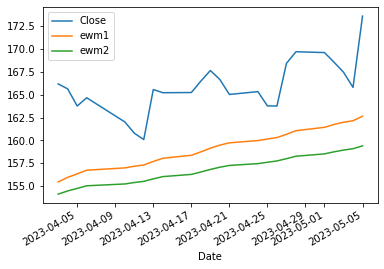

In [55]:
(raw_d
 .assign(ewm1=raw_d.Close.ewm(alpha=.0392).mean()
        ,ewm2=raw_d.Close.ewm(alpha=.00995).mean()) # mean() provides aggregation method
 .loc['Apr 2023':' May 2023', ['Close', 'ewm1', 'ewm2']]
 .plot()
)

## On-balance Volume (OBV)
Indicator of momentum using volume

Formula for three movements can be reviewed. Essentially, displays increase, flat, and decrease.

In [56]:
raw_d.Close

Date
2023-02-07    154.649994
2023-02-08    151.919998
2023-02-09    150.869995
2023-02-10    151.009995
2023-02-13    153.850006
                 ...    
2023-05-01    169.589996
2023-05-02    168.539993
2023-05-03    167.449997
2023-05-04    165.789993
2023-05-05    173.570007
Name: Close, Length: 62, dtype: float64

In [57]:
raw_d.Close.shift(1)

Date
2023-02-07           NaN
2023-02-08    154.649994
2023-02-09    151.919998
2023-02-10    150.869995
2023-02-13    151.009995
                 ...    
2023-05-01    169.679993
2023-05-02    169.589996
2023-05-03    168.539993
2023-05-04    167.449997
2023-05-05    165.789993
Name: Close, Length: 62, dtype: float64

In [58]:
# Naive method using base Python
def calc_obv(df):
    df = df.copy()
    df["OBV"] = 0.0
    
    # Loop through the data and calculate OBV
    for i in range(1, len(df)):
        if df["Close"][i] > df["Close"][i-1]:
            df["OBV"][i] = df["OBV"][i-1] + df["Volume"][i]
        elif df["Close"][i] < df["Close"][i-1]:
            df["OBV"][i] = df["OBV"][i-1] - df["Volume"][i]
        else:
            df["OBV"][i] = df["OBV"][i-1]
    return df

calc_obv(raw_d)
# Provides lots of warnings as pandas does not like working with copies. Better to use assign method

C:\Users\jamesmcneill\AppData\Local\Temp\ipykernel_24512\529456259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OBV"][i] = df["OBV"][i-1] - df["Volume"][i]
C:\Users\jamesmcneill\AppData\Local\Temp\ipykernel_24512\529456259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OBV"][i] = df["OBV"][i-1] + df["Volume"][i]


,Ticker,Open,High,Low,Close,Adj Close,Volume,OBV
Date,,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,0.0
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-64120100.0
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-120127200.0
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,-62676500.0
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,-477500.0
...,...,...,...,...,...,...,...,...
2023-05-01,AAPL,169.279999,170.449997,168.639999,169.589996,169.589996,52472900,283553900.0
2023-05-02,AAPL,170.089996,170.350006,167.539993,168.539993,168.539993,48425700,235128200.0
2023-05-03,AAPL,169.500000,170.919998,167.160004,167.449997,167.449997,65136000,169992200.0


In [59]:
%%timeit
calc_obv(raw_d)

C:\Users\jamesmcneill\AppData\Local\Temp\ipykernel_24512\529456259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OBV"][i] = df["OBV"][i-1] - df["Volume"][i]
C:\Users\jamesmcneill\AppData\Local\Temp\ipykernel_24512\529456259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OBV"][i] = df["OBV"][i-1] + df["Volume"][i]
C:\Users\jamesmcneill\AppData\Local\Temp\ipykernel_24512\529456259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

4.21 s ± 140 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
# Pandas method can be where
raw_d.Volume.where?

Signature:
raw_d.Volume.where(
    cond,
    other=<no_default>,
    inplace=False,
    axis=None,
    level=None,
    errors=<no_default>,
    try_cast=<no_default>,
)
Docstring:
Replace values where the condition is False.

Parameters
----------
cond : bool Series/DataFrame, array-like, or callable
    Where `cond` is True, keep the original value. Where
    False, replace with corresponding value from `other`.
    If `cond` is callable, it is computed on the Series/DataFrame and
    should return boolean Series/DataFrame or array. The callable must
    not change input Series/DataFrame (though pandas doesn't check it).
other : scalar, Series/DataFrame, or callable
    Entries where `cond` is False are replaced with
    corresponding value from `other`.
    If other is callable, it is computed on the Series/DataFrame and
    should return scalar or Series/DataFrame. The callable must not
    change input Series/DataFrame (though pandas doesn't check it).
inplace : bool, default False

In [61]:
%%timeit
# This is painful
(raw_d
 .assign(close_prev=raw_d.Close.shift(1)
        ,vol=0
        ,obv=lambda adf: adf.vol.where(cond=adf.Close == adf.close_prev
                                      ,other=adf.Volume.where(cond=adf.Close > adf.close_prev
                                                             ,other=adf.Volume.where(adf.Close < adf.close_prev, other=0)
                                                             )
                                      ).cumsum()
        )
)

7.2 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
# Pandas method from cell above showed large improvements compared to Naive approach
# Numpy np.select method is the preferred approach. Output will show assigned values
pd.Series(np.select(condlist=[raw_d.Close < 153, raw_d.Close > 168]
                   ,choicelist=[100, 200], default=33))

0      33
1     100
2     100
3     100
4      33
     ... 
57    200
58    200
59     33
60     33
61    200
Length: 62, dtype: int32

In [63]:
raw_d.Close # Review to check that opperations performed correctly

Date
2023-02-07    154.649994
2023-02-08    151.919998
2023-02-09    150.869995
2023-02-10    151.009995
2023-02-13    153.850006
                 ...    
2023-05-01    169.589996
2023-05-02    168.539993
2023-05-03    167.449997
2023-05-04    165.789993
2023-05-05    173.570007
Name: Close, Length: 62, dtype: float64

In [64]:
# Implement a version of this np.select method
# Lambdas can be so much more useful using this analysis method
(raw_d
 .assign(prev_close=raw_d.Close.shift(1)
        ,vol=np.select([raw_d.Close > raw_d.prev_close
                       ,raw_d.Close == raw_d.prev_close
                       ,raw_d.Close < raw_d.prev_close]
                      ,[raw_d.Volume, 0, -raw_d.Volume])
        ,obv=lambda df_:df_.vol.cumsum()
        )
)
# Doesn't work because np does not allow for assigned values that were created within the chain. Also does not allow lambda

AttributeError: 'DataFrame' object has no attribute 'prev_close'

In [ ]:
%%timeit
# How to get around this issue is to use the prev_close formula in the np.select method. 
# Time comparison shows 2x improvement relative to painful pandas implementation above.
(raw_d
 .assign(vol=np.select([raw_d.Close > raw_d.Close.shift(1)
                       ,raw_d.Close == raw_d.Close.shift(1)
                       ,raw_d.Close < raw_d.Close.shift(1)]
                      ,[raw_d.Volume, 0, -raw_d.Volume])
        ,obv=lambda df_:df_.vol.cumsum()
        )
)

In [ ]:
# Re-factor this code into a function to make it easier to run test script
def calc_obv(df, close_col='Close', vol_col='Volume'):
    close = df[close_col]
    vol = df[vol_col]
    close_shift = close.shift(1)
    return (df
         .assign(vol=np.select([close > close_shift
                               ,close == close_shift
                               ,close < close_shift]
                              ,[vol, 0, -vol])
                ,obv=lambda df_:df_.vol.fillna(0).cumsum()
                )
            ['obv']
        )

# Assign the function to create the variable
(raw_d
 .assign(obv=calc_obv)
)

In [ ]:
# How the code was tested to make sure that the logic worked as expected
test_df = pd.DataFrame({'Close': [10, 10.15, 10.17, 10.13, 10.11, 10.15, 10.2, 10.2, 10.22, 10.21],
                       'Volume': [25200, 30000, 25600, 32000, 23000, 40000, 36000, 20500, 23000, 27500]})

(test_df
 .assign(obv=calc_obv)
)

## OBV
- MFM = money flow multiplier
- MFV = Money flow volume

In [68]:
(raw_d
 .assign(mfm=((raw_d.Close - raw_d.Low)-(raw_d.High - raw_d.Close))/(raw_d.High - raw_d.Low),
        mfv=lambda df_:df_.mfm * df_.Volume, # lambda allows user to access current version of dataframe, including new variables created
        cmfv=lambda df_:df_.mfv.cumsum()
        )
)

,Ticker,Open,High,Low,Close,Adj Close,Volume,mfm,mfv,cmfv
Date,,,,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,0.747276,6.226495e+07,6.226495e+07
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-0.560118,-3.591481e+07,2.635015e+07
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-0.769823,-4.311554e+07,-1.676539e+07
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,0.688677,3.956496e+07,2.279957e+07
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,0.754498,4.692900e+07,6.972857e+07
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,AAPL,169.279999,170.449997,168.639999,169.589996,169.589996,52472900,0.049722,2.609047e+06,5.274242e+08
2023-05-02,AAPL,170.089996,170.350006,167.539993,168.539993,168.539993,48425700,-0.288259,-1.395917e+07,5.134651e+08
2023-05-03,AAPL,169.500000,170.919998,167.160004,167.449997,167.449997,65136000,-0.845748,-5.508864e+07,4.583764e+08


<AxesSubplot:xlabel='Date'>

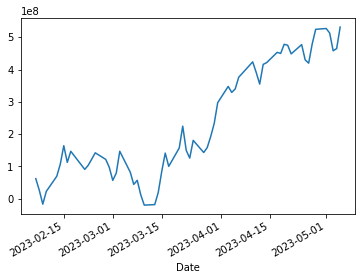

In [71]:
# Re-factor code to create a function. Remember to have the df paramter to allow for the chaining to work
def calc_ad(df, close_col='Close', low_col='Low', high_col='High', vol_col='Volume'):
    close = df[close_col]
    low = df[low_col]
    high = df[high_col]
    return (df
     .assign(mfm=((close - low)-(high - close))/(high - low),
            mfv=lambda df_:df_.mfm * df_[vol_col], 
            cmfv=lambda df_:df_.mfv.cumsum())
        .cmfv
)

(raw_d
 .assign(ad=calc_ad)
 .ad
 .plot()
)

## RSI
Create the Relative Strength Income (RSI) column.

A popular momentum indicator
- > 70 overbought
- < 30 oversold

RSI = 100 - (100 / 1 + RS)

where RS is the relative strength, calculated as:
RS = AverageGain / AverageLoss

Where Average N means:
- Average of first 14 values for first value
- (Previous Average * 13 + current N) / 14

In [72]:
# When working to understand if the logic makes sense. It is normally a good idea to take data used within
# an excel spreadshet to show that data can be tested against to produce the same results.

In [75]:
# Basic solution
(raw_d
 .assign(change=raw_d.Close.diff(),
         gain=lambda df:df.change.clip(lower=0), # pandas method allows us to use this as constraint
         loss=lambda df:df.change.clip(upper=0),
        )
)

,Ticker,Open,High,Low,Close,Adj Close,Volume,change,gain,loss
Date,,,,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN,NaN
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-2.729996,0.000000,-2.729996
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-1.050003,0.000000,-1.050003
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,0.139999,0.139999,0.000000
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2.840012,2.840012,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,AAPL,169.279999,170.449997,168.639999,169.589996,169.589996,52472900,-0.089996,0.000000,-0.089996
2023-05-02,AAPL,170.089996,170.350006,167.539993,168.539993,168.539993,48425700,-1.050003,0.000000,-1.050003
2023-05-03,AAPL,169.500000,170.919998,167.160004,167.449997,167.449997,65136000,-1.089996,0.000000,-1.089996


In [76]:
# Implementing formula that would be seen within excel spreadsheet
# Calculating the rolling 14 day averages
def avg(df, col, window_size=14):
    results = []
    window = []
    for i, val in enumerate(df[col]):
        window.append(val)
        if i < (window_size):
            results.append(np.nan)
        elif i == (window_size):
            window.pop(0)
            results.append(sum(window)/window_size)
        else:
            results.append((results[-1] * (window_size - 1) + val)
                          / window_size)
    return pd.Series(results, index=df.index)

In [82]:
# apply function to create each of the variables
(raw_d
 .assign(change=raw_d.Close.diff(),
         gain=lambda df:df.change.clip(lower=0),
         loss=lambda df:df.change.clip(upper=0),
         avg_gain=lambda df:avg(df, col='gain'),
         avg_loss=lambda df:-avg(df, col='loss'),
         rs=lambda df:df.avg_gain/df.avg_loss,
         RSI=lambda df:np.select([df.avg_loss==0], [100],
                                (100-(100/(1+df.rs))))
        )
 .iloc[:20]
)

,Ticker,Open,High,Low,Close,Adj Close,Volume,change,gain,loss,avg_gain,avg_loss,rs,RSI
Date,,,,,,,,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-2.729996,0.000000,-2.729996,NaN,NaN,NaN,NaN
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-1.050003,0.000000,-1.050003,NaN,NaN,NaN,NaN
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,0.139999,0.139999,0.000000,NaN,NaN,NaN,NaN
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2.840012,2.840012,0.000000,NaN,NaN,NaN,NaN
2023-02-14,AAPL,152.119995,153.770004,150.860001,153.199997,153.199997,61707600,-0.650009,0.000000,-0.650009,NaN,NaN,NaN,NaN
2023-02-15,AAPL,153.110001,155.500000,152.880005,155.330002,155.330002,65573800,2.130005,2.130005,0.000000,NaN,NaN,NaN,NaN
2023-02-16,AAPL,153.509995,156.330002,153.350006,153.710007,153.710007,68167900,-1.619995,0.000000,-1.619995,NaN,NaN,NaN,NaN
2023-02-17,AAPL,152.350006,153.000000,150.850006,152.550003,152.550003,59144100,-1.160004,0.000000,-1.160004,NaN,NaN,NaN,NaN


In [83]:
# Reviewing more efficient solution to keep operations working with pandas / numpy. By having the for
# loop this operation uses python which is slower.

In [84]:
%%timeit
(raw_d
 .assign(change=raw_d.Close.diff(),
         gain=lambda df:df.change.clip(lower=0),
         loss=lambda df:df.change.clip(upper=0),
         avg_gain=lambda df:avg(df, col='gain'),
         avg_loss=lambda df:-avg(df, col='loss'),
         rs=lambda df:df.avg_gain/df.avg_loss,
         RSI=lambda df:np.select([df.avg_loss==0], [100],
                                (100-(100/(1+df.rs))))
        )
)

16.6 ms ± 548 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
# Convert the code to numba to take advantage of the numpy operations
# Will take the python for loop version and optimise
# import numba
import numba as nb
# numba doesn't like Pandas input/output, convert to numpy
# add a decorator to allow code to work. jit will convert to C to speed processing
@nb.jit(nb.float64[:](nb.float64[:], nb.int64))
# ser = numpy array. Need to convert input data to ensure this works
def avg_nb(ser, window_size):
    results = np.empty(len(ser))
    window = []
    for i, val in enumerate(ser):
        window.append(val)
        if i < (window_size):
            results[i] = np.nan
        elif i == (window_size):
            window.pop(0)
            results[i] = sum(window)/window_size
        else:
            results[i] = ((results[-1] * (window_size - 1) + val)
                          / window_size)
    return results

In [87]:
%%timeit
(raw_d
 .assign(change=raw_d.Close.diff(),
         gain=lambda df:df.change.clip(lower=0),
         loss=lambda df:df.change.clip(upper=0),
         avg_gain=lambda df:avg_nb(df.gain.to_numpy(), 14),
         avg_loss=lambda df:-avg_nb(df.loss.to_numpy(), 14),
         rs=lambda df:df.avg_gain/df.avg_loss,
         RSI=lambda df:np.select([df.avg_loss==0], [100],
                                (100-(100/(1+df.rs))))
        )
)

13.8 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
# try the same operation with big data
big = np.random.rand(1_000_000) # the underscore allows for writing larger numbers as a comma will mess up things for the interpreter
big_df = pd.DataFrame({'val':big})

In [89]:
%%timeit
(big_df
 .assign(smooth=lambda df:avg_nb(df.val.to_numpy(), 14))
)

67 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [90]:
%%timeit
# naive version
(big_df
 .assign(smooth=lambda df:avg(df, 'val', 14))
)

1.74 s ± 74.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
# Check difference in speed (shows that numba is faster)
1_740/76

22.894736842105264

In [92]:
# Make sure to work with the naive python version of code before changing to numba to ensure that
# the initial logic is working correctly.